In [318]:
from toygrad import Value
from draw_graph import *
import random


EXAMPLE 1: Cost of Driving

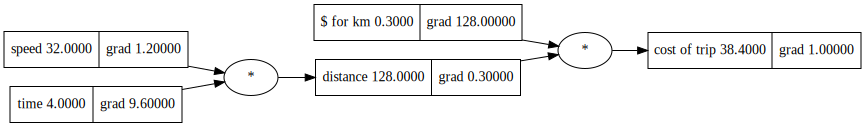

In [332]:

#Let's define our variables

speed = Value(32, _label="speed") #speed in km/h
time = Value(4, _label="time") #time of driving

distance = speed * time #Total distance 
distance._label = "distance"

fuel_cost_per_km = Value(0.3, _label="$ for km") #How much we spend on fuel 


total_cost = distance * fuel_cost_per_km
total_cost._label = "cost of trip"



#Let's figure out which part influence total cost computing derivatives
total_cost.backward()

#Let's draw the computational graph with result

draw_dot(total_cost)

EXAMPLE 2: Computing derivative of complicated function

$\text{F(x,y)} = (x - 0.2)^3 + \frac{1}{e^{2y} } + xy$


gradient of x wrt to F is 10.42
gradient of y wrt ti F is 1.506806072116787


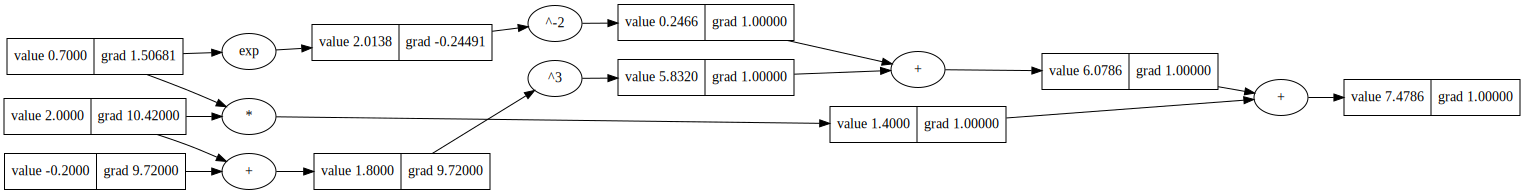

In [343]:

x = Value(2)
y = Value(0.7)


#Compute your function step by  step
step1 = (x - 0.2) ** 3
step2 = y.exp() ** -2
step3 = step1 + step2 + x*y


#run backpropogation on last step
step3.backward()

print(f"gradient of x wrt to F is {x.grad}")  #dF/dx =  10.42
print(f"gradient of y wrt ti F is {y.grad}")  #dF/dy = 1.506


#draw computation graph

draw_dot(step3)